<a href="https://colab.research.google.com/github/kmongsil1105/colab_ipynb/blob/main/6th_Transfer_Learning_(%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5)%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6차시: 텐서플로우 2.x 활용 
# Transfer Learning (전이 학습) 기초


# ** 6주차: Transfer Learning 이미지 분류 **


# 1. 도구 불러오기 및 버전 확인

tensorflow_hub
⇒ 각종 텐서플로우 모델 공유 서비스
전이 학습을 쉽게 할 수 있도록 해줌!

PIL (Python Image Library) :: 
가장 대표적인 Python 3 이미지 도구

In [ ]:
import os
import random

import tensorflow as tf           # 텐서플로우
import tensorflow_hub as hub      # 다른이가 만들어놓은 모델을 가져오는 도구
import matplotlib.pyplot as plt   # 시각화 도구
%matplotlib inline
import numpy as np

import PIL.Image as Image         # 이미지 사용을 위한 도구


print(f'Tensorflow 버전을 확인합니다: {tf.__version__}')


Tensorflow 버전을 확인합니다: 2.3.0


# 2. 학습 데이터 불러오기:
### From Google Drive


* 데이터를 구조화할 것!

 최상단 폴더 이름: dataset

  내부 폴더 이름: 분류 레이블

  내부 폴더 이미지: 여러개 (10개 이상?)

  dataset 루트폴더에서 zip 파일로 압축!


구글 드라이브에 업로드!

  ::   Colab Notebooks 폴더안에 dataset.zip 업로드

# Load Data From Google Drive : 
코드 실행하면 나오는 URL로 접속 ==> 로그인 후 나오는 인증 코드를 입력!

실행결과 : Mounted at /content/gdrive : 요렇게 나오면 구글드라이브와 연동된 것!!!

In [ ]:
# Load Data From Google Drive
# 코드 실행하면 나오는 URL로 접속 ==> 로그인 후 나오는 인증 코드를 입력!

try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print(f'Google colab 환경이 아닙니다.')
    pass


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 업로드한 데이터 압축 해제

In [ ]:
# 업로드한 데이터 압축 해제 
# Linux 명령어 수행
# 결과로 압축해서 업로드한 레이블 리스트가 나오면 성공! ( (ex) cat  deer  dog ) : 각 폴더별 50개씩의 사진

!rm -r '/tmp/dataset'    # rm : remove
!unzip -d '/tmp/' '/content/gdrive/My Drive/Colab Notebooks/dataset.zip'  # unzip
!ls '/tmp/dataset'       # ls : 폴더내용을 보여줌


rm: cannot remove '/tmp/dataset': No such file or directory
Archive:  /content/gdrive/My Drive/Colab Notebooks/dataset.zip
   creating: /tmp/dataset/cat/
  inflating: /tmp/dataset/cat/cat1.jpg  
  inflating: /tmp/dataset/cat/cat10.jpg  
  inflating: /tmp/dataset/cat/cat11.jpg  
  inflating: /tmp/dataset/cat/cat12.jpg  
  inflating: /tmp/dataset/cat/cat13.jpg  
  inflating: /tmp/dataset/cat/cat14.jpg  
  inflating: /tmp/dataset/cat/cat15.jpg  
  inflating: /tmp/dataset/cat/cat16.jpg  
  inflating: /tmp/dataset/cat/cat17.jpg  
  inflating: /tmp/dataset/cat/cat18.jpg  
  inflating: /tmp/dataset/cat/cat19.jpg  
  inflating: /tmp/dataset/cat/cat2.jpg  
  inflating: /tmp/dataset/cat/cat20.jpg  
  inflating: /tmp/dataset/cat/cat21.jpg  
  inflating: /tmp/dataset/cat/cat22.jpg  
  inflating: /tmp/dataset/cat/cat23.jpg  
  inflating: /tmp/dataset/cat/cat24.jpg  
  inflating: /tmp/dataset/cat/cat25.jpg  
  inflating: /tmp/dataset/cat/cat26.jpg  
  inflating: /tmp/dataset/cat/cat27.jpg  
  inflat

# 데이터 셋 불러오기

In [ ]:
# 데이터 셋 불러오기
# flow_from_directory() ⇒ 압축 해제한 데이터를 불러오는 함수
# IMAGE_SHAPE 설정!!!   자신의 이미지에 맞추어서 적당한 값!


dataset_root = os.path.abspath(os.path.expanduser('/tmp/dataset'))
print(f'Dataset root: {dataset_root}')

IMAGE_SHAPE = (128, 128)                    # 자신의 dataset 크기에 맞추어서 조정! ::  IMAGE_SHAPE = (128, 128) 
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                  validation_split=0.2)
train_data = image_generator.flow_from_directory(dataset_root, target_size=IMAGE_SHAPE,   #  압축 해제한 데이터를 불러오는 함수
                                                 subset='training')
validation_data = image_generator.flow_from_directory(dataset_root, target_size=IMAGE_SHAPE,
                                                 subset='validation')

for image_batch, label_batch in validation_data:
    print(f'Image batch shape: {image_batch.shape}')
    print(f'Label batch shape: {label_batch.shape}')
    break




Dataset root: /tmp/dataset
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Image batch shape: (30, 128, 128, 3)
Label batch shape: (30, 3)


# 3. 학습 데이터 살펴보기

## TensorFlow Hub :: 텐서플로우용 각종 모델 공유 서비스

### ==> TensorFlow Hub에서 "inception_v3" 모델을 가져옴!!!


In [ ]:
# TensorFlow Hub에서 "inception_v3" 모델을 가져옴!!!
# 텐서플로우용 각종 모델 공유 서비스
# https://tfhub.dev/ 

classifier_url = 'https://tfhub.dev/google/imagenet/inception_v3/classification/4'

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,)) # Channel 3 RGB
])

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 
                                      'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())


16384/10484 [==============================================] - 0s 0us/step


# **  ImageNet :: 직접 레이블링 한 이미지 데이터셋 **
CV분야에서 가장 대표적인 성능 지표로 활용됨



# ImageNet 학습 결과에 맞추어서 내 데이터를 분류해 줌
##    :: 1000개 레이블, 특징 추출 레이어

Batch result shape: (30, 1001)
Batch predicted class names: ['basenji' 'tiger cat' 'ibex' 'Pomeranian' 'weasel' 'Pembroke' 'gazelle'
 'gazelle' 'tabby' 'impala' 'hare' 'Cardigan' 'cheetah' 'Madagascar cat'
 'weasel' 'Blenheim spaniel' 'Chihuahua' 'chimpanzee' 'lynx' 'wallaby'
 'lynx' 'bluetick' 'impala' 'standard poodle' 'limpkin' 'Samoyed'
 'standard poodle' 'ostrich' 'wallaby' 'hamster']


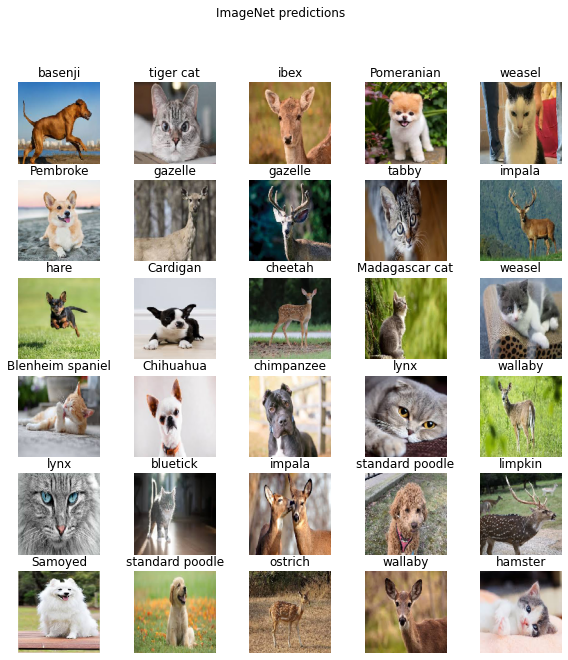

In [ ]:
result_batch = classifier.predict(image_batch)
print(f'Batch result shape: {result_batch.shape}')

predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
print(f'Batch predicted class names: {predicted_class_names}')

fig = plt.figure(figsize=(10, 10.5))
for n in range(30):  # 데이터 갯수가 작을경우(30개 미만) :: range(5)정도로 한다.
    ax = fig.add_subplot(6, 5, n+1)
    ax.imshow(image_batch[n])
    ax.set_title(predicted_class_names[n])
    ax.axis('off')
_ = fig.suptitle('ImageNet predictions')

# ImageNet의 레이블과 내 데이터의 레이블이 다르므로... 말도 안되는 햄스터, 직소퍼즐..등으로 분류될 수 있다.
# 내 dataset의 사진이 제대로 불러와 졌는지는 확인할 수 있다!!

# **    AlexNet모델 : CNN on ImageNet    **
::    AlexNet 모델이 : 20% 이상이던 에러율을 처음으로 16.4%로...  CNN 기반 분류기가 우승한 사례  


# 4. Convolution Neural Network 

   ==>  우리의 CNN 모델로 학습시킬 것임!!

# Callback: 학습 / 검증 후 데이터 저장 객체 : 제대로 된 정확도 비교!!!

   기존: 학습 후 출력되던 데이터

   변경: 학습 / 검증 결과 변수에 저장


In [ ]:
# Callback: 학습 / 검증 후 데이터 저장 객체

class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_val_losses = []
        self.batch_acc = []
        self.batch_val_acc = []
    
    def on_epoch_end(self, epoch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['accuracy'])
        self.batch_val_losses.append(logs['val_loss'])
        self.batch_val_acc.append(logs['val_accuracy'])
        self.model.reset_metrics()



# 학습용 예제 이미지 확인! :: 32 x 32 이미지가 6만장!


In [ ]:
# 학습용 예제 이미지 확인!

cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=image_batch.shape[1:]),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(train_data.num_classes)])

cnn_model.summary()

# 3주차(CNN) 때 했던 모델 그대로임!!

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# 모델 컴파일

In [ ]:
# 모델 컴파일

base_learning_rate = 0.001

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


# Our CNN 학습

In [ ]:
# Our CNN 학습 : 우리의 CNN 방식에 맞추어서 학습??

# 정확도가 얼마나 나오는지 확인!
# 매우 높다면? ⇒ 분류 난이도가 쉬운 것
# 낮다면? ⇒ 전이 학습에서 기대


steps_per_epoch = np.ceil(train_data.samples/train_data.batch_size)
epochs = 25*2
cnn_callback = CollectBatchStats()

cnn_history = cnn_model.fit(train_data,
                            epochs=epochs,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=validation_data,
                            callbacks=[cnn_callback])


Epoch 1/50
4/4 [==============================] - 0s 79ms/step - loss: 1.4654 - accuracy: 0.2500 - val_loss: 1.0941 - val_accuracy: 0.4000
Epoch 2/50
4/4 [==============================] - 0s 49ms/step - loss: 1.1005 - accuracy: 0.4500 - val_loss: 1.0952 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 48ms/step - loss: 1.0728 - accuracy: 0.4083 - val_loss: 1.0821 - val_accuracy: 0.4333
Epoch 4/50
4/4 [==============================] - 0s 45ms/step - loss: 1.0241 - accuracy: 0.6583 - val_loss: 1.0722 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 48ms/step - loss: 0.9765 - accuracy: 0.5167 - val_loss: 1.0156 - val_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 43ms/step - loss: 0.8554 - accuracy: 0.7083 - val_loss: 1.0189 - val_accuracy: 0.4667
Epoch 7/50
4/4 [==============================] - 0s 44ms/step - loss: 0.8818 - accuracy: 0.6583 - val_loss: 0.9750 - val_accuracy: 0.5000
Epoch 8/50
4/4 [===========

# Our CNN 학습 결과 확인 ==> 그래프로 

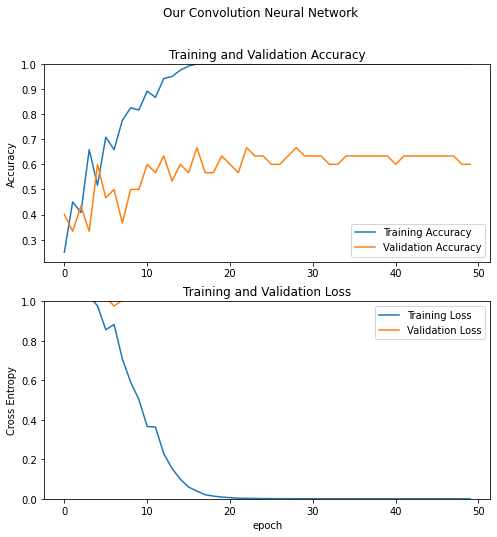

In [ ]:
# Our CNN 학습 결과 확인

# Draw learning curves chart
# Draw learning curves chart
acc = cnn_callback.batch_acc
val_acc = cnn_callback.batch_val_acc
loss = cnn_callback.batch_losses
val_loss = cnn_callback.batch_val_losses

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')
ax.legend(loc='lower right')
ax.set_ylabel('Accuracy')
ax.set_ylim([min(plt.ylim()),1])
ax.set_title('Training and Validation Accuracy')

ax = fig.add_subplot(2, 1, 2)
ax.plot(loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')
ax.legend(loc='upper right')
ax.set_ylabel('Cross Entropy')
ax.set_ylim([0,1.0])
ax.set_title('Training and Validation Loss')
ax.set_xlabel('epoch')
_ = fig.suptitle('Our Convolution Neural Network')



Classes: ['Cat' 'Deer' 'Dog']


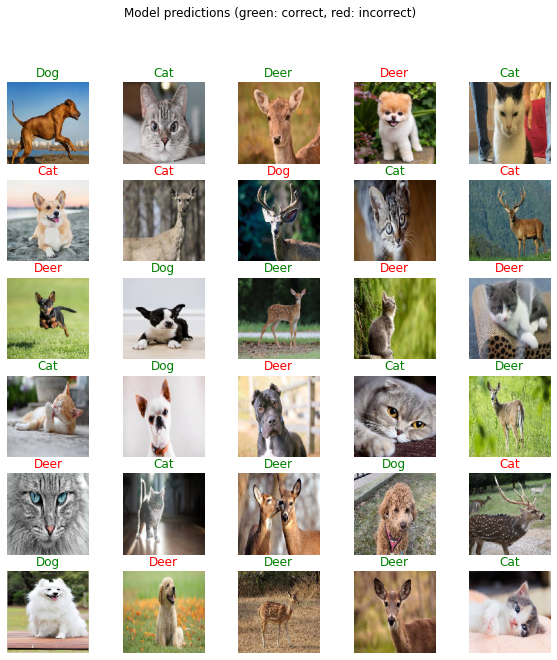

In [ ]:
# Our CNN 학습 결과 예제

class_names = sorted(validation_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
print(f'Classes: {class_names}')

## get result labels
predicted_batch = cnn_model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

label_id = np.argmax(label_batch, axis=-1)

## plot
fig = plt.figure(figsize=(10, 10.5))
for n in range(30):
    ax = fig.add_subplot(6, 5, n+1)
    ax.imshow(image_batch[n])
    color = 'green' if predicted_id[n] == label_id[n] else 'red'
    ax.set_title(predicted_label_batch[n].title(), color=color)
    ax.axis('off')
_ = fig.suptitle('Model predictions (green: correct, red: incorrect)')



# ***  만약, 정확도가 너무 낮다면…   ***

1. 특징(차이)이 너무 작음

2. 작은 차이도 학습할 수 있는 충분한 데이터가 없음

3. CNN 레이어를 넓고 깊게 만들면 된다 ==> 하지만 시간이 너무 오래 걸림....

4. 뇌세포를 더 많이 만든다 ==> 데이타가 엄청 많은 모델로 우선 학습 : 그 정보(뉴런) 레이어들로 학습!!!   1000개를 구분하는 모델(뇌세포)들을 가져와서 내 데이터셋에 적용 (전이 학습)


# 5. Transfer Learning(전이 학습)

뇌세포를 더 많이 만든다 ==> 데이타가 엄청 많은 모델로 우선 학습 : 그 정보(뉴런) 레이어들로 학습!!!   1000개를 구분하는 모델(뇌세포)들을 가져와서 내 데이터셋에 적용 (전이 학습)

# Inception v1 : Google
22레이어의 엄청난 Computing Power 투자

ILSVRC 2014 우승


# Inception v2(Inception Resnet v2): 어? Computing Power를 더 넣어볼까?

252 레이어!!

V3를 만들기 위한 실험의 성격이 있음 : 똑같은 모델을 반복해서 넣는것이 문제점!!!


# Inception v3 Design Principles

v2를 압축해서 더 빠르게~~ 
층을 더 잘게 나누어서... 성능은 빠르게 만듬!!

## ** 요즈음의 아이디어(방법): Transfer Learning **

1. 각 Layer, Neuron은 일반적인 데이터로 학습

2. 일반적인 데이터에서 분류를 위한 '특징점'을 학습

3. 학습한 '특징점'을 이용하여 원하는 목적에 맞추어 Fine-tune


In [ ]:
# 특징 추출 모델 다운로드
# 처음에는 특징 추출 레이어는 학습하지 않아야 함 :: trainable = False
# 특징 추출 레이어는 그대로 가져오고, 우리의 데이터를 이용해서 분류만 한다!!! 

feature_extractor_url = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SHAPE+(3, ))
feature_batch = feature_extractor_layer(image_batch)
print(f'Feature vector shape: {feature_batch.shape}')

## Frozen feature extraction layer
feature_extractor_layer.trainable = False

## Make a model for classification
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.summary()

predictions= model(image_batch)
print(f'Prediction shape: {predictions.shape}')



Feature vector shape: (30, 2048)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 6147      
Total params: 21,808,931
Trainable params: 6,147
Non-trainable params: 21,802,784
_________________________________________________________________
Prediction shape: (30, 3)


In [ ]:
# 전이 학습 시작!
# 특징 추출 레이어는 그대로 두고 ‘분류’
# ImageNet 분류를 위해 학습한 레이어 활용

base_learning_rate = 0.001

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


steps_per_epoch = np.ceil(train_data.samples/train_data.batch_size) # train all dataset per epoch
initial_epoch = 25
batch_stats_callback = CollectBatchStats()

history = model.fit(train_data,
                    epochs=initial_epoch,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_data,
                    callbacks=[batch_stats_callback])



Epoch 1/25
4/4 [==============================] - 1s 227ms/step - loss: 1.1250 - accuracy: 0.4000 - val_loss: 1.0872 - val_accuracy: 0.4333
Epoch 2/25
4/4 [==============================] - 0s 56ms/step - loss: 0.8327 - accuracy: 0.7083 - val_loss: 0.9070 - val_accuracy: 0.6000
Epoch 3/25
4/4 [==============================] - 0s 54ms/step - loss: 0.7274 - accuracy: 0.8250 - val_loss: 0.8325 - val_accuracy: 0.7000
Epoch 4/25
4/4 [==============================] - 0s 56ms/step - loss: 0.6524 - accuracy: 0.9083 - val_loss: 0.7413 - val_accuracy: 0.8333
Epoch 5/25
4/4 [==============================] - 0s 56ms/step - loss: 0.6295 - accuracy: 0.9417 - val_loss: 0.7205 - val_accuracy: 0.8333
Epoch 6/25
4/4 [==============================] - 0s 54ms/step - loss: 0.6041 - accuracy: 0.9500 - val_loss: 0.7072 - val_accuracy: 0.8000
Epoch 7/25
4/4 [==============================] - 0s 59ms/step - loss: 0.5908 - accuracy: 0.9500 - val_loss: 0.6922 - val_accuracy: 0.8000
Epoch 8/25
4/4 [==========

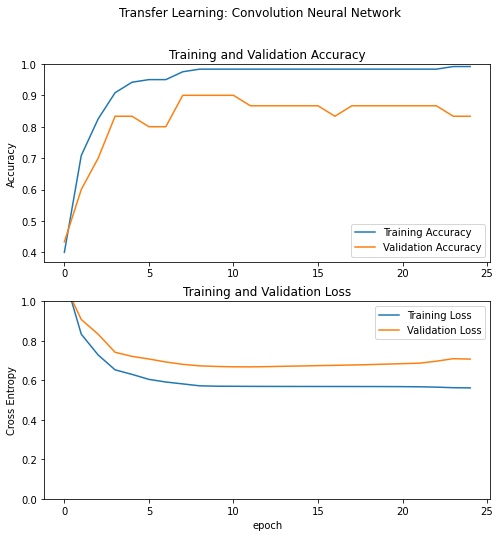

In [ ]:
# 전이 학습 결과 확인!
# (대부분) Our CNN 보다 정확도가 높아짐 

acc = batch_stats_callback.batch_acc
val_acc = batch_stats_callback.batch_val_acc
loss = batch_stats_callback.batch_losses
val_loss = batch_stats_callback.batch_val_losses

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')
ax.legend(loc='lower right')
ax.set_ylabel('Accuracy')
ax.set_ylim([min(plt.ylim()),1])
ax.set_title('Training and Validation Accuracy')

ax = fig.add_subplot(2, 1, 2)
ax.plot(loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')
ax.legend(loc='upper right')
ax.set_ylabel('Cross Entropy')
ax.set_ylim([0,1.0])
ax.set_title('Training and Validation Loss')
ax.set_xlabel('epoch')
_ = fig.suptitle('Transfer Learning: Convolution Neural Network')


Classes: ['Cat' 'Deer' 'Dog']


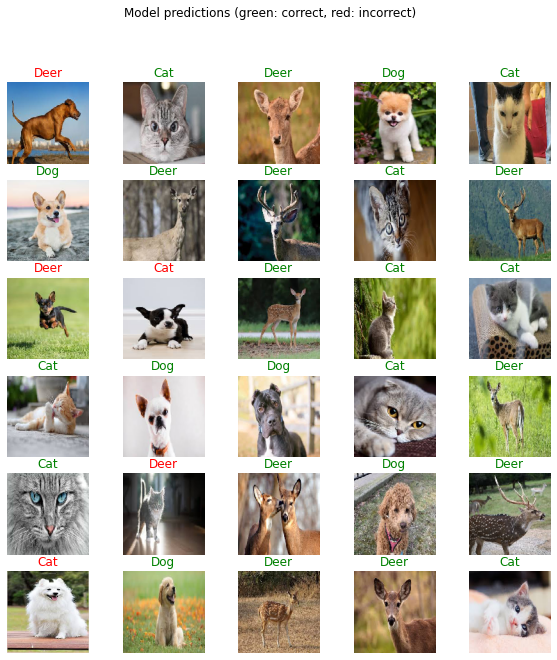

In [ ]:
# 전이 학습 결과 예제!

class_names = sorted(validation_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
print(f'Classes: {class_names}')

## get result labels
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

label_id = np.argmax(label_batch, axis=-1)

## plot
fig = plt.figure(figsize=(10, 10.5))
for n in range(30):
    ax = fig.add_subplot(6, 5, n+1)
    ax.imshow(image_batch[n])
    color = 'green' if predicted_id[n] == label_id[n] else 'red'
    ax.set_title(predicted_label_batch[n].title(), color=color)
    ax.axis('off')
_ = fig.suptitle('Model predictions (green: correct, red: incorrect)')


# 6. Transfer Learning Finetune

이제 특징 추출 레이어도 학습! 

우리 데이터에 맞추어서...
학습 변수 급증!
6,147 → 21,774,499



In [ ]:
# Transfer Learning Fine-tune

feature_extractor_layer.trainable = True   # 우리 데이터로 공부도 하기 시작

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

model.summary()

# 학습 변수가 급증 : Trainable params: 21,774,499 (속도는 느려질 수 있다)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 6147      
Total params: 21,808,931
Trainable params: 21,774,499
Non-trainable params: 34,432
_________________________________________________________________


# Transfer Learning Fine-tune 학습
학습 시간이 엄청 느려짐 (GPU를 사용해도!)

학습 초기 정확도는 오히려 떨어질 것! :: 특징 추출 레이어가 학습을 시작해서… 


In [ ]:
# Transfer Learning Fine-tune 학습

finetune_epoch = 25

history_fine = model.fit(train_data,
                        epochs=initial_epoch+finetune_epoch,
                        initial_epoch=initial_epoch,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=validation_data,
                        callbacks = [batch_stats_callback])


Epoch 26/50
4/4 [==============================] - 1s 303ms/step - loss: 1.1281 - accuracy: 0.5583 - val_loss: 0.9033 - val_accuracy: 0.8333
Epoch 27/50
4/4 [==============================] - 0s 84ms/step - loss: 0.6083 - accuracy: 0.8917 - val_loss: 0.9808 - val_accuracy: 0.8333
Epoch 28/50
4/4 [==============================] - 0s 88ms/step - loss: 0.4374 - accuracy: 0.9667 - val_loss: 0.9741 - val_accuracy: 0.8333
Epoch 29/50
4/4 [==============================] - 0s 83ms/step - loss: 0.3574 - accuracy: 0.9833 - val_loss: 0.8440 - val_accuracy: 0.8667
Epoch 30/50
4/4 [==============================] - 0s 84ms/step - loss: 0.3371 - accuracy: 0.9667 - val_loss: 0.7565 - val_accuracy: 0.9000
Epoch 31/50
4/4 [==============================] - 0s 91ms/step - loss: 0.2595 - accuracy: 1.0000 - val_loss: 0.7001 - val_accuracy: 0.9333
Epoch 32/50
4/4 [==============================] - 0s 87ms/step - loss: 0.2532 - accuracy: 1.0000 - val_loss: 0.6635 - val_accuracy: 0.9000
Epoch 33/50
4/4 [==

Text(0.5, 0, 'epoch')

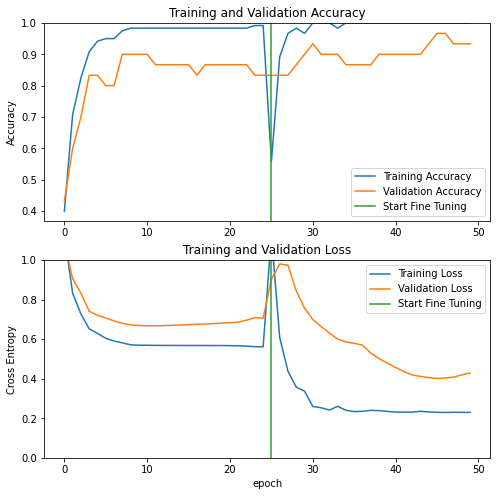

In [ ]:
# Transfer Learning Fine-tune 학습 결과 확인!
# Loss 가 확실하게 줄어듬!


# Draw learning curves chart
fine_acc = batch_stats_callback.batch_acc
fine_val_acc = batch_stats_callback.batch_val_acc
fine_loss = batch_stats_callback.batch_losses
fine_val_loss = batch_stats_callback.batch_val_losses

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')
ax.set_ylabel('Accuracy')
ax.set_ylim([min(plt.ylim()),1])
ax.plot([initial_epoch,initial_epoch],
        ax.get_ylim(), label='Start Fine Tuning')
ax.legend(loc='lower right')
ax.set_title('Training and Validation Accuracy')

ax = fig.add_subplot(2, 1, 2)
ax.plot(loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')
ax.set_ylabel('Cross Entropy')
ax.set_ylim([0,1.0])
ax.plot([initial_epoch,initial_epoch],
        ax.get_ylim(), label='Start Fine Tuning')
ax.legend(loc='upper right')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('epoch')


Classes: ['Cat' 'Deer' 'Dog']


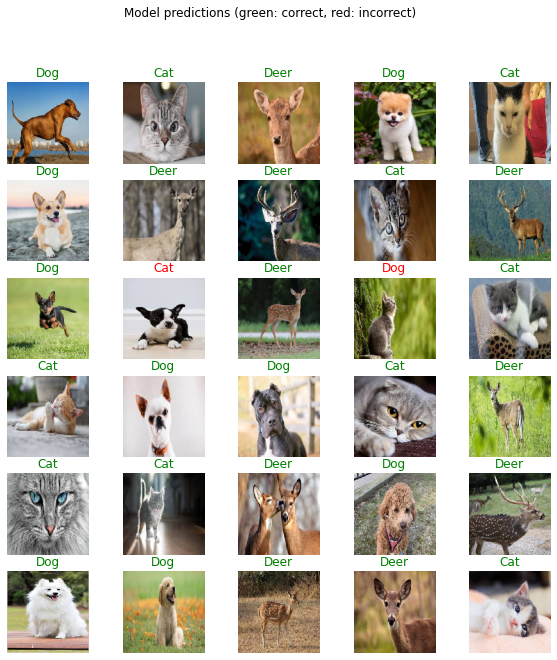

In [ ]:
# Loss 가 확실하게 줄어듬!

class_names = sorted(validation_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
print(f'Classes: {class_names}')

## get result labels
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

label_id = np.argmax(label_batch, axis=-1)

## plot
fig = plt.figure(figsize=(10, 10.5))
for n in range(30):
    ax = fig.add_subplot(6, 5, n+1)
    ax.imshow(image_batch[n])
    color = 'green' if predicted_id[n] == label_id[n] else 'red'
    ax.set_title(predicted_label_batch[n].title(), color=color)
    ax.axis('off')
_ = fig.suptitle('Model predictions (green: correct, red: incorrect)')

